In [123]:
# https://github.com/jin-s13/COCO-WholeBody
# https://cocodataset.org/#download
# https://cocodataset.org/#keypoints-2017

In [161]:
"""
Sources

new dataset:
https://github.com/Fang-Haoshu/Halpe-FullBody

https://github.com/nicknochnack/FaceDetection/blob/main/FaceDetection.ipynb
https://towardsdatascience.com/bounding-box-prediction-from-scratch-using-pytorch-a8525da51ddc

http://shuoyang1213.me/WIDERFACE/
https://github.com/jin-s13/COCO-WholeBody/blob/master/data_format.md

https://pytorch.org/hub/pytorch_vision_vgg/

"""

'\nSources\n\nnew dataset:\nhttps://github.com/Fang-Haoshu/Halpe-FullBody\n\nhttps://github.com/nicknochnack/FaceDetection/blob/main/FaceDetection.ipynb\nhttps://towardsdatascience.com/bounding-box-prediction-from-scratch-using-pytorch-a8525da51ddc\n\nhttp://shuoyang1213.me/WIDERFACE/\nhttps://github.com/jin-s13/COCO-WholeBody/blob/master/data_format.md\n\nhttps://pytorch.org/hub/pytorch_vision_vgg/\n\n'

In [125]:

l_pair = [
    (0, 1), (0, 2), (1, 3), (2, 4),  # Head
    (5, 18), (6, 18), (5, 7), (7, 9), (6, 8), (8, 10),# Body
    (17, 18), (18, 19), (19, 11), (19, 12),
    (11, 13), (12, 14), (13, 15), (14, 16),
    (20, 24), (21, 25), (23, 25), (22, 24), (15, 24), (16, 25),# Foot
    (26, 27),(27, 28),(28, 29),(29, 30),(30, 31),(31, 32),(32, 33),(33, 34),(34, 35),(35, 36),(36, 37),(37, 38),#Face
    (38, 39),(39, 40),(40, 41),(41, 42),(43, 44),(44, 45),(45, 46),(46, 47),(48, 49),(49, 50),(50, 51),(51, 52),#Face
    (53, 54),(54, 55),(55, 56),(57, 58),(58, 59),(59, 60),(60, 61),(62, 63),(63, 64),(64, 65),(65, 66),(66, 67),#Face
    (68, 69),(69, 70),(70, 71),(71, 72),(72, 73),(74, 75),(75, 76),(76, 77),(77, 78),(78, 79),(79, 80),(80, 81),#Face
    (81, 82),(82, 83),(83, 84),(84, 85),(85, 86),(86, 87),(87, 88),(88, 89),(89, 90),(90, 91),(91, 92),(92, 93),#Face
    (94,95),(95,96),(96,97),(97,98),(94,99),(99,100),(100,101),(101,102),(94,103),(103,104),(104,105),#LeftHand
    (105,106),(94,107),(107,108),(108,109),(109,110),(94,111),(111,112),(112,113),(113,114),#LeftHand
    (115,116),(116,117),(117,118),(118,119),(115,120),(120,121),(121,122),(122,123),(115,124),(124,125),#RightHand
    (125,126),(126,127),(115,128),(128,129),(129,130),(130,131),(115,132),(132,133),(133,134),(134,135)#RightHand
]
p_color = [(0, 255, 255), (0, 191, 255), (0, 255, 102), (0, 77, 255), (0, 255, 0),  # Nose, LEye, REye, LEar, REar
           (77, 255, 255), (77, 255, 204), (77, 204, 255), (191, 255, 77), (77, 191, 255), (191, 255, 77),  # LShoulder, RShoulder, LElbow, RElbow, LWrist, RWrist
           (204, 77, 255), (77, 255, 204), (191, 77, 255), (77, 255, 191), (127, 77, 255), (77, 255, 127),  # LHip, RHip, LKnee, Rknee, LAnkle, RAnkle, Neck
           (77, 255, 255), (0, 255, 255), (77, 204, 255),  # head, neck, shoulder
           (0, 255, 255), (0, 191, 255), (0, 255, 102), (0, 77, 255), (0, 255, 0), (77, 255, 255)] # foot

line_color = [(0, 215, 255), (0, 255, 204), (0, 134, 255), (0, 255, 50),
              (0, 255, 102), (77, 255, 222), (77, 196, 255), (77, 135, 255), (191, 255, 77), (77, 255, 77),
              (77, 191, 255), (204, 77, 255), (77, 222, 255), (255, 156, 127),
              (0, 127, 255), (255, 127, 77), (0, 77, 255), (255, 77, 36), 
              (0, 77, 255), (0, 77, 255), (0, 77, 255), (0, 77, 255), (255, 156, 127), (255, 156, 127)]


In [340]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2
from tqdm import tqdm

from PIL import Image
from PIL import Image, ImageStat


from NotebookNotifications.Notifications import notify

In [127]:
image_folder = "data/hico_20160224_det/images/train2015/"
save_folder = 'results/visualizations/'

# 3, 4, 17, 18

In [271]:
f = open("data/halpe_train_v1.json")
annotations_dict = json.load(f)

In [272]:
imgs = {}
for img in annotations_dict['images']:
    imgs[img['id']] = img

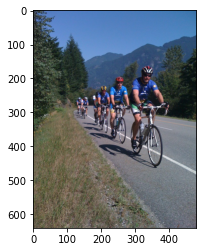

In [280]:
fig, ax = plt.subplots()

im = plt.imread(image_folder + "HICO_train2015_00009511.jpg")

# rect = patches.Rectangle((50, 100), 40, 30, linewidth=1, edgecolor='r', facecolor='none')

ax.imshow(im)
plt.show()

In [351]:
desired_keypoints = [17,18]
X_train = []
y_train = []


def is_grayscale(im):
    stat = ImageStat.Stat(im)
    return len(stat.sum) != 3


for idx, annot in tqdm(enumerate(annotations_dict['annotations'])):
    if 'keypoints' in annot and type(annot['keypoints']) == list:

        imgname = str(imgs[annot['image_id']]['file_name'])

        kp = np.array(annot['keypoints'])
        kp_x = kp[0::3]
        kp_y = kp[1::3]
        kp_scores = kp[2::3]
        
        img = Image.open(image_folder + imgname)            

        all_above_threshold = np.all(0.6 <= kp_scores[desired_keypoints])
        if not all_above_threshold or img.mode == "L":
            continue



        y = np.array([])
        for n in desired_keypoints:
            cor_x, cor_y = int(kp_x[n]), int(kp_y[n])
            y_ = np.array([cor_x / img.size[0], cor_y / img.size[1]])
            y = np.concatenate((y, y_), axis=0)

        X_train.append(img)
        y_train.append(y)

        if 100 <= len(X_train):
            break

# X_train = np.array(X_train, dtype=object)
# y_train = np.array(y_train)
        

113it [00:00, 1915.22it/s]


In [132]:
# for idx, annot in tqdm(enumerate(annotations_dict['annotations'])):
#     if 50 < idx:
#         break
#     if 'keypoints' in annot and type(annot['keypoints']) == list:
#         imgname = str(imgs[annot['image_id']]['file_name'])
        
#         if os.path.exists(os.path.join(save_folder, imgname)):
#             img = cv2.imread(os.path.join(save_folder, imgname))
#         else:
#             img = cv2.imread(os.path.join(image_folder, imgname))
#         part_line = {}
#         kp = np.array(annot['keypoints'])
#         kp_x = kp[0::3]
#         kp_y = kp[1::3]
#         kp_scores = kp[2::3]
        
#         # Draw keypoints
#         for n in [17,18]: #range(kp_scores.shape[0]): #
#             if kp_scores[n] <= 0.6:
#                 continue
#             cor_x, cor_y = int(kp_x[n]), int(kp_y[n])
#             part_line[n] = (int(cor_x), int(cor_y))
#             if n < len(p_color):
#                 cv2.circle(img, (int(cor_x), int(cor_y)), 2, p_color[n], -1)
#             else:
#                 cv2.circle(img, (int(cor_x), int(cor_y)), 1, (255,255,255), 2)
#         # Draw limbs
#         # for i, (start_p, end_p) in enumerate(l_pair):
#         #     if start_p in part_line and end_p in part_line:
#         #         start_xy = part_line[start_p]
#         #         end_xy = part_line[end_p]
#         #         if i < len(line_color):
#         #             cv2.line(img, start_xy, end_xy, line_color[i], 2)
#         #         else:
#         #             cv2.line(img, start_xy, end_xy, (255,255,255), 1)

#         cv2.imwrite(os.path.join(save_folder,imgname),img)

51it [00:00, 176.13it/s]


In [305]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

from torchvision.models import vgg16
from torchvision import models
from PIL import Image

# TODO: Not all operations in VGG16 work on mps
device = "cpu"#"mps" if torch.backends.mps.is_available() else "cpu"

In [353]:
def GlobalMaxPool2D(x):
    x = torch.functional.F.adaptive_max_pool2d(x, (1, 1))
    return x.reshape(x.size(0), -1)


# Define model
class FaceNet(nn.Module):

    def __init__(self):
        super().__init__()

        self.model = models.vgg16(weights='DEFAULT')

        # Classification model
        self.classifier = nn.Sequential(
            nn.Linear(512, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1),
            nn.Sigmoid()
        )

        # Regression model
        self.reggression = nn.Sequential(
            nn.Linear(512, 2048),
            nn.ReLU(),
            nn.Linear(2048, 4),
            nn.Sigmoid()
        )


    # Set your own forward pass
    def forward(self, x, extra_info=None):
        x = self.model.features(x)

        x = GlobalMaxPool2D(x)

        # Classify
        logits = self.classifier(x)
        positions = self.reggression(x)

        return (logits, positions)

model = FaceNet().to(device)
# print(model)

In [354]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [357]:

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# For one image
# input_tensor = preprocess(im)
# X = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


X = [preprocess(im).unsqueeze(0) for im in X_train]
X = torch.cat(X, axis=0)


In [358]:
with torch.no_grad():
    output = model(X)
output

(tensor([[0.4767],
         [0.3773],
         [0.5990],
         [0.7090],
         [0.4671],
         [0.4931],
         [0.5564],
         [0.4558],
         [0.7255],
         [0.5998],
         [0.5828],
         [0.7734],
         [0.6535],
         [0.6107],
         [0.6567],
         [0.7963],
         [0.5957],
         [0.7409],
         [0.7022],
         [0.6299],
         [0.5553],
         [0.6849],
         [0.6470],
         [0.5763],
         [0.5898],
         [0.6573],
         [0.7417],
         [0.5380],
         [0.6872],
         [0.6719],
         [0.6357],
         [0.8196],
         [0.7725],
         [0.5541],
         [0.5951],
         [0.5870],
         [0.7138],
         [0.8039],
         [0.6329],
         [0.7147],
         [0.4767],
         [0.5166],
         [0.6425],
         [0.4611],
         [0.6785],
         [0.7052],
         [0.7469],
         [0.5174],
         [0.5182],
         [0.4849],
         [0.5102],
         [0.6556],
         [0.

In [170]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
# probabilities = torch.nn.functional.softmax(output[0], dim=0)
# print(probabilities)

In [171]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

parachute 0.21871282160282135
black grouse 0.17557819187641144
rifle 0.1584901213645935
assault rifle 0.053400225937366486
cannon 0.042045071721076965
